In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.getcwd())
cwd = os.getcwd()
# Any results you write to the current directory are saved as output.

C:\Users\Administrator\Documents\Deep_learning\future_lab\lab_project02


In [2]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,Softmax,Input,Flatten
from keras.optimizers import Adam,RMSprop,SGD
from keras.layers.merge import add
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import BatchNormalization
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator, load_img

from IPython.display import display
from  PIL import Image

C:\Users\Administrator\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [37]:
from kapre.utils import Normalization2D
from kapre.augmentation import AdditiveNoise

In [3]:
# dimensions of our images.
img_width, img_height = 579, 238
# img_width, img_height = 150, 150 # VGG 적용

In [4]:
train_data_dir = cwd + '/last_img_data'
# validation_data_dir = cwd + '/chest_xray/val'
# test_data_dir = cwd + '/chest_xray/test'

# nb_train_samples = 5217
# nb_validation_samples = 17
epochs = 20
batch_size = 4

In [5]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 7997 images belonging to 8 classes.


In [8]:
model = Sequential()
# model.add(AdditiveNoise(power=0.2))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same",
                 input_shape=input_shape))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding="same"))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(20,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(rate=0.4))
model.add(Dense(8, activation="softmax"))

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy']) # if single-label classification

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 579, 238, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 579, 238, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 579, 238, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 289, 119, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 289, 119, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 289, 119, 64)      18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 289, 119, 64)      36928     
__________

In [11]:
import keras.backend.tensorflow_backend as K
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

In [12]:
# checkpoint = ModelCheckpoint("test_audio_model.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
# early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')
tb = TensorBoard(log_dir='test0829_tl')

In [13]:
with K.tf.device('/gpu:0'):
    hist = model.fit_generator(
        train_generator,
        epochs = epochs,
        callbacks = [tb]
    )

Epoch 1/20
2000/2000 [==============================] - 506s 253ms/step - loss: 1.9955 - acc: 0.2221
Epoch 2/20
2000/2000 [==============================] - 507s 253ms/step - loss: 1.8338 - acc: 0.3095
Epoch 3/20
2000/2000 [==============================] - 505s 253ms/step - loss: 1.7942 - acc: 0.3321
Epoch 4/20
2000/2000 [==============================] - 506s 253ms/step - loss: 1.7558 - acc: 0.3554
Epoch 5/20
2000/2000 [==============================] - 503s 251ms/step - loss: 1.7065 - acc: 0.3755
Epoch 6/20
2000/2000 [==============================] - 500s 250ms/step - loss: 1.6246 - acc: 0.4114
Epoch 7/20
2000/2000 [==============================] - 506s 253ms/step - loss: 1.5448 - acc: 0.4353
Epoch 8/20
2000/2000 [==============================] - 507s 253ms/step - loss: 1.4514 - acc: 0.4741
Epoch 9/20
2000/2000 [==============================] - 507s 254ms/step - loss: 1.4275 - acc: 0.4818
Epoch 10/20
2000/2000 [==============================] - 505s 252ms/step - loss: 1.3017 - a

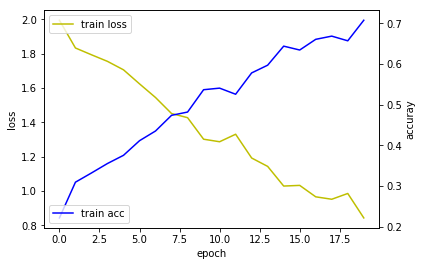

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [15]:
model.save_weights('model_weights(18_08_29).h5')